# CSE 258 Assigment 2

## Import Packages

In [1]:
! pip install implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 50.6 MB/s eta 0:00:00


In [1]:
import os
import zipfile
import pandas
import csv
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
import statistics
import scipy
from implicit import bpr
from sklearn import linear_model

# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/CSE258-Final'


## Import Dataset

In [2]:
archive = zipfile.ZipFile('dataset.zip', 'r')
archive.extractall()

In [3]:
moive_genre = []
movie_reviews = []
for filename in archive.namelist():
    if "1_movies_per_genre" in filename:
        moive_genre.append(filename)
    else:
        movie_reviews.append(filename)
moive_genre.pop(0)
movie_reviews.pop(0)

'2_reviews_per_movie_raw/'

In [4]:
data_dict = {}
for f in movie_reviews:
    with open(f, mode ='r') as file:
        csv_reader = csv.DictReader(file)
        data_dict[f[24:-9]] = [row for row in csv_reader]

genre_dict = {}
for f in moive_genre:
    with open(f, mode ='r') as file:
        csv_reader = csv.DictReader(file)
        genre_dict[f[19:-4]] = [row for row in csv_reader]

print(data_dict["The Young Victoria"])
print(genre_dict["Action"])

[{'username': 'JamesHitchcock', 'rating': '8', 'helpful': '148', 'total': '167', 'date': '23 March 2009', 'title': ' A touching romance and a gripping human drama\n', 'review': 'Apart from having the longest reign in British history (63 years), Queen Victoria also holds two other distinctions. She was, apart from our current Queen, the oldest ever British monarch, living to the age of 81. And she was also the youngest ever British (as opposed to English or Scottish) monarch, coming to the throne as a girl of eighteen. And yet whenever television or the cinema make a programme or film about her, they seem far more interested in the older Victoria than they do in the young girl; the version of Victoria with which modern audiences will probably be most familiar is Judi Dench in "Mrs Brown". "The Young Victoria" tries to redress the balance by showing us the events surrounding her accession and the early years of her reign. It has the rare distinction of being produced by a former Royal, S

In [41]:
moviesPerUser_raw = defaultdict(set)
usersPerMovie_raw = defaultdict(set)
ratingPerUser = defaultdict(list)
ratingPerMovie = defaultdict(list)
yearRating = defaultdict(list)
movieUserPair = set()
users = set()
movies = set()
data = []
betaU_dict = {}
betaI_dict = {}
movie_ratings_raw = []
userIDs, movieIDs = {}, {}

for movie, comments in data_dict.items():
    movies.add(movie)
    if not movie in movieIDs: movieIDs[movie] = len(movieIDs)
    for comment in comments:
        user = comment["username"]
        data.append(comment)
        data[-1]["moviename"] = movie
        users.add(user)
        moviesPerUser_raw[user].add(movie)
        usersPerMovie_raw[movie].add(user)
        if not user in userIDs: userIDs[user] = len(userIDs)
        if comment["rating"] != "Null":
            rating = int(comment["rating"])
            yearRating[comment["date"][-4:]].append(rating)
            ratingPerUser[user].append(rating)
            ratingPerMovie[movie].append(rating)
            betaU_dict[user] = [betaU_dict.get(user, [0.0, 0])[0] + rating, betaU_dict.get(user, [0.0, 0])[1] + 1]
            betaI_dict[movie] = [betaI_dict.get(movie, [0.0, 0])[0] + rating, betaI_dict.get(movie, [0.0, 0])[1] + 1]
            movie_ratings_raw.append([user, movie, rating])

#print(moviesPerUser_raw["JamesHitchcock"])
#print(usersPerMovie_raw["The Young Victoria"])

In [54]:
thres = 3

movie_ratings = []
moviesPerUser = defaultdict(set)
usersPerMovie = defaultdict(set)

for u in moviesPerUser_raw:
    if len(moviesPerUser_raw[u]) > thres:
        moviesPerUser[u] = moviesPerUser_raw[u]

for item in movie_ratings_raw:
    if item[0] in moviesPerUser:
        movie_ratings.append(item)
        usersPerMovie[item[1]].add(item[0])
        
random.shuffle(movie_ratings)

print(len(movie_ratings))

397033


In [6]:
moviesPerGenre = defaultdict(set)
genresPerMovie = defaultdict(set)
genres = set()

for genre, movies in genre_dict.items():
    genres.add(genre)
    for movieinfo in movies:
        movie = movieinfo['name']
        moviesPerGenre[genre].add(movie)
        genresPerMovie[movie].add(genre)

print(genresPerMovie["The Dark Knight"])
print(moviesPerGenre["Action"])

{'Drama', 'Action', 'Crime'}
{'Skyfall', 'The Bourne Ultimatum', 'Guardians of the Galaxy Vol. 2', 'Star Wars: Episode VI - Return of the Jedi', 'Independence Day', 'Jurassic Park', 'X-Men: First Class', 'Star Trek', 'The Dark Knight Rises', 'The Dark Knight', 'Black Panther', 'The Lord of the Rings: The Fellowship of the Ring', 'Batman v Superman: Dawn of Justice', 'Taken', 'Avengers: Endgame', 'Oldboy', 'John Wick', 'Iron Man 2', 'Gladiator', 'Minority Report', 'Rogue One: A Star Wars Story', 'The Hunger Games: Catching Fire', 'Captain America: Civil War', 'Kick-Ass', 'I, Robot', 'Harry Potter and the Order of the Phoenix', 'Star Wars: Episode VII - The Force Awakens', 'Suicide Squad', 'Thor: The Dark World', 'Spider-Man', 'Lock, Stock and Two Smoking Barrels', 'Sherlock Holmes', 'The Matrix Reloaded', 'Wonder Woman', 'Looper', 'Blade Runner', 'Avengers: Infinity War', 'X2: X-Men United', 'Spider-Man: Homecoming', 'The Matrix', 'Star Wars: Episode I - The Phantom Menace', 'Captain Am

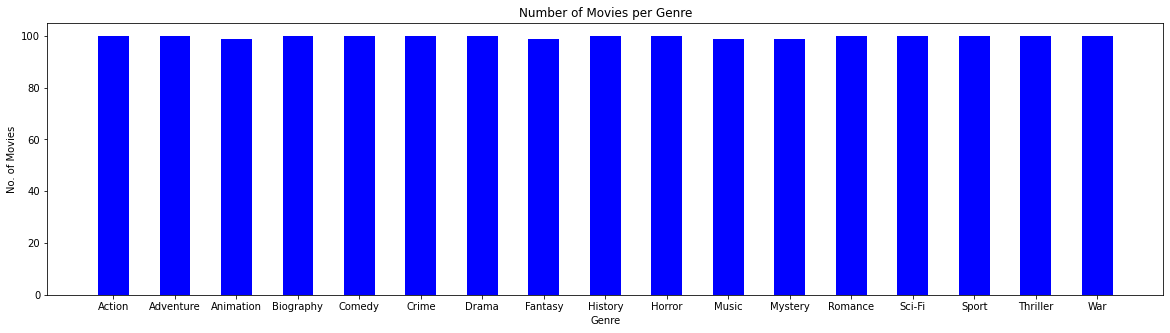

In [7]:
x = []
y = []
for key, value in moviesPerGenre.items():
    x.append(key)
    y.append(len(value))

fig = plt.figure(figsize = (20, 5))
plt.bar(x, y, color ='blue', width = 0.5)
plt.xlabel("Genre")
plt.ylabel("No. of Movies")
plt.title("Number of Movies per Genre")
plt.show()

{'username': 'MR_Heraclius', 'rating': '10', 'helpful': '85', 'total': '92', 'date': '12 February 2020', 'title': ' The Dark Knight\n', 'review': 'Confidently directed, dark, brooding, and packed with impressive action sequences and a complex story, The Dark Knight includes a career-defining turn from Heath Ledger as well as other Oscar worthy performances, TDK remains not only the best Batman movie, but comic book movie ever created.', 'moviename': 'The Dark Knight'}


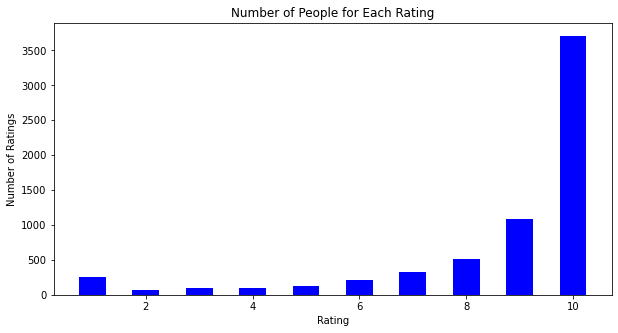

In [8]:
y = [0 for i in range(10)]
x = [(i+1) for i in range(10)]

print(data_dict["The Dark Knight"][0])

for comment in data_dict["The Dark Knight"]:
    if comment["rating"] != "Null":
        y[int(comment["rating"])-1] += 1

fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color ='blue', width = 0.5)
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.title("Number of People for Each Rating")
plt.show()

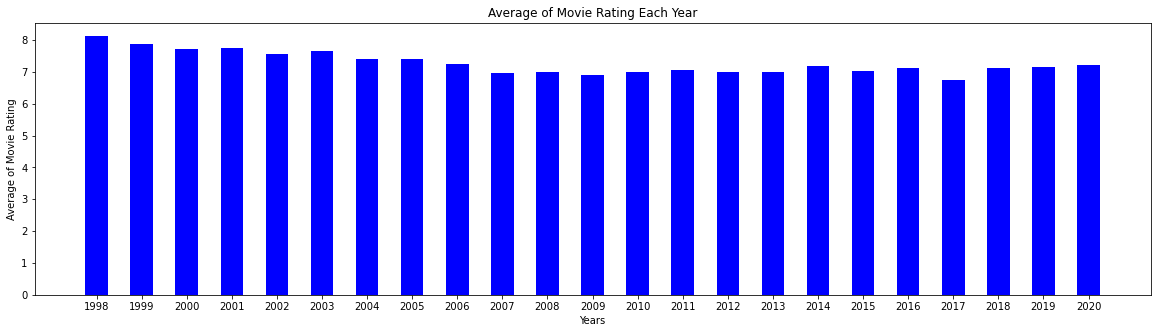

In [9]:
x = []
y = []

items = sorted(list(yearRating.items()))
for year, rating in items:
    x.append(year)
    y.append(sum(rating)/len(rating))

fig = plt.figure(figsize = (20, 5))
plt.bar(x, y, color ='blue', width = 0.5)
plt.xlabel("Years")
plt.ylabel("Average of Movie Rating")
plt.title("Average of Movie Rating Each Year")
plt.show()

In [46]:
betaU = {}
betaI = {}

random.shuffle(movie_ratings)
ratings = [r[-1] for r in movie_ratings]
globalAverage = sum(ratings) * 1.0 / len(ratings)

for u in betaU_dict:
    betaU[u] = betaU_dict[u][0] / betaU_dict[u][1] - globalAverage

for m in betaI_dict:
    betaI[m] = betaI_dict[m][0] / betaI_dict[m][1] - globalAverage

alpha = globalAverage

In [47]:
print(alpha)
print(data[0])

7.273883430775721
{'username': 'Imme-van-Gorp', 'rating': '7', 'helpful': '102', 'total': '123', 'date': '30 January 2019', 'title': ' Unfortunately the ending ruined an otherwise great film.\n', 'review': 'This movie is full of suspense. It makes you guess about what is real and what is not. It happens more than once that you have to wonder about what is the truth and who is lying.<br/><br/>Because you are just as clueless as the main character, Michelle, you really get to experience the same type of emotions and confusion as she is. This not only makes you feel closer to Michelle as a character, but also to the overall story.<br/><br/>They did, however, ruin this connection that they build over the course of the story by making this sloppy, rushed and just strange ending. If they had made a different ending, my rating could have been an 8 or maybe even a 9. Depends on how good of an ending it would have been.', 'moviename': '10 Cloverfield Lane'}


In [48]:
def iterate(alpha, betaU, betaI, lamb=1, iteration=5):
    for _ in range(iteration):
        betaU_new = {}
        betaI_new = {}
        alpha_new = 0.0
        ratingPerUser = {}
        ratingPerItem = {}
        thres = 1e-3

        for u, m, rating in movie_ratings[:int(len(movie_ratings)*0.8)]:
            alpha_new += (rating - betaU[u] - betaI[m])

        ###  update alpha  ###
        alpha_new /= len(movie_ratings[:int(len(movie_ratings)*0.8)])
        alpha = alpha_new
        #print("alpha", alpha_new)
        
        for u, m, rating in movie_ratings[:int(len(movie_ratings)*0.8)]:
            ratingPerUser[u] = [ratingPerUser.get(u, [0.0, 0])[0] + (rating - alpha - betaI[m]), ratingPerUser.get(u, [0.0, 0])[1] + 1]
            
        ###  update betaU  ###
        for u in ratingPerUser:
            betaU_new[u] = ratingPerUser[u][0] / (lamb + ratingPerUser[u][1])
        
        #print("betaU", list(betaU_new.items())[:10])
        betaU = betaU_new
        
        for u, m, rating in movie_ratings[:int(len(movie_ratings)*0.8)]:
            ratingPerMovie[m] = [ratingPerMovie.get(m, [0.0, 0])[0] + (rating - alpha - betaU[u]), ratingPerMovie.get(m, [0.0, 0])[1] + 1]
        ###  update betaI  ###
        for m in ratingPerMovie:
            betaI_new[m] = ratingPerMovie[m][0] / (lamb + ratingPerMovie[m][1])
            
        #print("betaI", list(betaI_new.items())[:10])
        
        #print(alpha_new - alpha)

#         if alpha_new - alpha < thres and converge(betaU_new, betaU, thres) and converge(betaI_new, betaI, thres):
#             break

        alpha, betaU, betaI = alpha_new, betaU_new, betaI_new
    
    return alpha_new, betaU_new, betaI_new

In [49]:
def clip(n):
    n = round(n)
    n = max(n, 1)
    n = min(n, 10)
    return n

In [50]:
def mse(alpha, betaU, betaI):
    mse = 0.0
    for u, m, rating in movie_ratings[int(len(movie_ratings)*0.8):]:
        if u in betaU and m in betaI:
            mse += (rating - clip(alpha + betaU[u] + betaI[m]))**2
        elif m in betaI:
            mse += (rating - clip(alpha - betaI[m]))**2
        else:
            mse += (rating - clip(alpha))**2
    mse /= len(movie_ratings[int(len(movie_ratings)*0.8):])
    return mse

In [53]:
for i in range(5):
    alpha, betaU, betaI = iterate(alpha, betaU, betaI, 5, 1)
    validMSE = mse(alpha, betaU, betaI)
    print("mse:", validMSE)

mse: 4.637824805786231
mse: 4.638126171979641
mse: 4.636965354049469
mse: 4.6360277703366375
mse: 4.636295651397446


In [154]:
print(len(movie_ratings[int(len(movie_ratings)*0.8):]))

166876


In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

X = [[alpha, betaU[u], betaI[m]] for u, m, rating in movie_ratings]
y = ratings

ridge=Ridge()
parameters={'alpha':[0,1e-3,1e-2,1,5]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

KeyError: 'theothegiant'

In [ ]:
pred = ridge_regressor.predict(X)
mse = 0.0
for i in range(len(pred)):
    mse += (y[i] - round(pred[i]))**2
mse /= len(movie_ratings)
print(mse)

In [24]:
import pandas as pd
from surprise import BaselineOnly, SVD, SVDpp, Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate

kf = KFold(n_splits=3)

min_rating, max_rating = 1, 10

ratings_dict = {"userID": [], "itemID": [], "ratings": []}
for l in movie_ratings:
    ratings_dict["userID"].append(l[0])
    ratings_dict["itemID"].append(l[1])
    ratings_dict["ratings"].append(l[2])

df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(min_rating, max_rating))
data_df = Dataset.load_from_df(df[["userID", "itemID", "ratings"]], reader)
trainset, testset = train_test_split(data_df, test_size=0.2)
# model = BaselineOnly()
model = SVD()

#for trainset, testset in kf.split(data_df):

# train and test algorithm.
model.fit(trainset)
predictions = model.test(testset)

# Compute and print Root Mean Squared Error
accuracy.rmse(predictions, verbose=True)

RMSE: 2.6078


2.607848921327437

In [21]:
trainset, testset = train_test_split(data_df, test_size=0.25)
pred = model.test(testset)

mse = 0.0
for i in range(len(pred)):
    mse += (pred[i][2] - clip(pred[i][3]))**2
mse /= len(pred)
print(mse)

accuracy.mse(pred, verbose=True)

5.00901747405259
MSE: 4.9251


4.925066131975192

In [32]:
a = list(moviesPerUser.values())
#c = 0
b = []
c = []
for i in a:
    #c += len(i)
    if len(i) > 1:
        b.append(len(i))
    if len(i) > 2:
        c.append(len(i))
print(len(c))
print(len(b))

52616
103823


## Average rating per genres

In [8]:
def addlabels(x, y, fontSize=8, height=0.1):
    y = [round(num, 2) for num in y]
    for i in range(len(x)):
        plt.text(i, y[i]+height, y[i], ha = 'center', fontsize=fontSize)

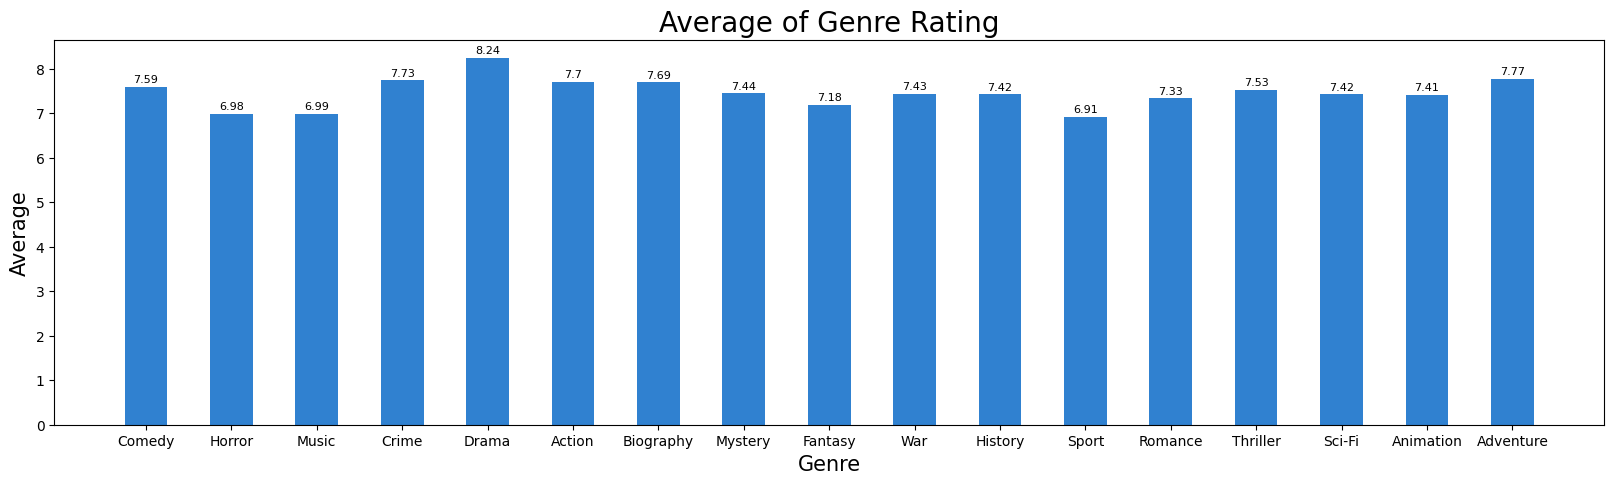

In [9]:
genre_rating = {}
for gen in genres:
    avg_rating = 0.
    for movie in genre_dict[gen]:
        avg_rating += float(movie['rating'])
    genre_rating[gen] = avg_rating / len(genre_dict[gen])

x = range(len(genre_rating))
y = list(genre_rating.values())

fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(x, y, tick_label=list(genre_rating.keys()), color ='#3081D0', width = 0.5)
addlabels(x, y)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Average", fontsize=15)
plt.title("Average of Genre Rating", fontsize=20)
plt.show()

## Length of movie timeline

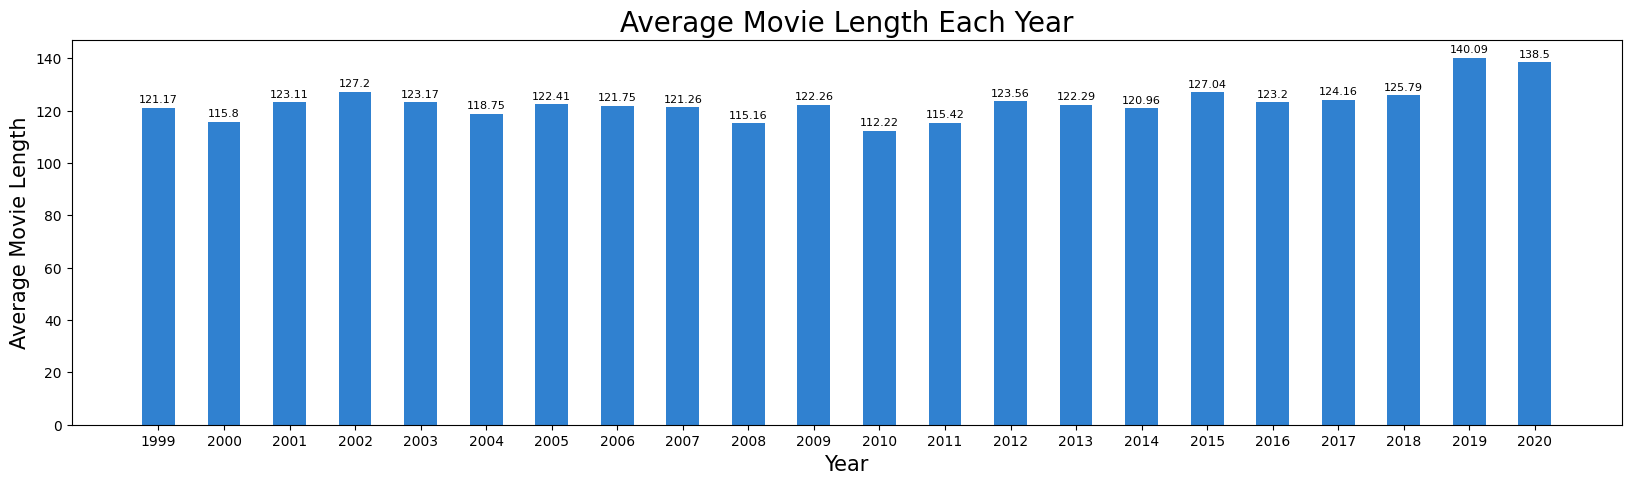

In [10]:
yearLength = defaultdict(list)
for gen in genre_dict.values():
    for movie in gen:
        if len(movie['run_length']) == 2:
            movie_length = datetime.datetime.strptime(movie['run_length'], '%Hh').time()
        else:
            movie_length = datetime.datetime.strptime(movie['run_length'], '%Hh %Mmin').time()
        yearLength[movie['year']].append(movie_length)

yearAvgLen = {}
for year, time in yearLength.items():
    minSum = 0
    for t in time:
        minSum += t.hour * 60 + t.minute
    yearAvgLen[int(year)] = minSum / len(time)

y = []
label = []
for key in sorted(yearAvgLen.keys()):
    if key < 1999:
        continue
    y.append(yearAvgLen[key])
    label.append(key)
x = range(len(y))

fig, ax = plt.subplots(figsize=(20, 5))
plt.bar(x, y, tick_label=label, color='#3081D0', width=0.5)
addlabels(x, y, 8, 2)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Average Movie Length", fontsize=15)
plt.title("Average Movie Length Each Year", fontsize=20)
plt.show()

## Movie per user prediction

### Would Watch

#### Jaccard Similarity

In [11]:
def Jaccard(s1, s2):
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [12]:
def isPlayed(u, i, func, thres):
    similarities = []
    users = usersPerMovie[i]
    candidateMovies = set()
    for u in users:
        candidateMovies = candidateMovies.union(moviesPerUser[u])
    for i2 in candidateMovies:
        if i2 == i: continue
        sim = func(users, usersPerMovie[i2])
        similarities.append(sim)
    if not similarities:
        return False
    similarities.sort()

    # return similarities[-1] >= thres

    return statistics.mean(similarities[-3:]) > thres

In [26]:
samples = []
flaseSampleNum = 1
falseMovieUserPair = set()
for movie, comments in movieUserPair:
    for comment in comments:
        user = comment["username"]
        samples.append([(movie, comment['username']), True])

        for _ in range(flaseSampleNum):
            while True:
                false_movie = random.choices([*movies],k=1)[0]['name']
                false_sample = (user, false_movie)
                if false_sample not in movieUserPair and false_sample not in falseMovieUserPair:
                    break
            falseMovieUserPair.add(false_sample)
            samples.append([false_sample, False])

KeyboardInterrupt: ignored

In [29]:
random.seed(666)
random.shuffle(samples)
trian_sample = samples[:int(0.9*len(samples))]
valid_sample = samples[int(0.9*len(samples)):]

In [ ]:
correct = 0
thres = 0.001

for s in trian_sample:
    played = isPlayed(s[0][0], s[0][1], Jaccard, thres)
    popular = len(usersPerMovie[s[0][1]]) > 60
    if (s[1] and played) or (s[1] and popular) or (not s[1] and not played and not popular):
        correct += 1
print(correct / len(samples))

#### BayesianPersonalizedRanking

In [ ]:
Xui = scipy.sparse.lil_matrix((len(userIDs), len(movieIDs)))
for pair, label in samples:
    if not label:
        continue
    Xui[userIDs[pair[0]], movieIDs[pair[1]]] = 1

Xui_csr = scipy.sparse.csr_matrix(Xui)

In [ ]:
model = bpr.BayesianPersonalizedRanking()
model.fit(Xui_csr)

In [ ]:
correct = 0
num_recommended = 200

for s in samples:
    recommended = model.recommend(userIDs[u], Xui_csr[userIDs[u]], N=num_recommended)
    rcmSet = {s for s in recommended}
    if (s[1] and s[0] in rcmSet) or (not s[1] and s[0] not in rcmSet):
        correct += 1
print(correct / len(samples))

#### Logistic

In [ ]:
def BER(pred, ground_truth):
    TP_ = numpy.logical_and(pred, ground_truth)
    FP_ = numpy.logical_and(pred, numpy.logical_not(ground_truth))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ground_truth))
    FN_ = numpy.logical_and(numpy.logical_not(pred), ground_truth)

    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)

    return 1 - 0.5*(TP / (TP + FN) + TN / (TN + FP)

In [ ]:
model = linear_model.LogisticRegression(C=1, random_state=0, max_iter=500000)